In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [15]:
WORKING_DIR = '/home/arinmirza/PycharmProjects/CompressionBenchmark/'
MODE = ['debug', 'release']
COMPILER = ['clang14', 'gcc11']
COMPRESSION_LEVEL = list(range(1, 10))

count_success = 0
count_failure = 0

data = {compiler: {mode: {compression_level: None for compression_level in COMPRESSION_LEVEL} for mode in MODE}  for compiler in COMPILER}
 
def safe_read_csv(filepath):
    global count_success
    global count_failure
    if not os.path.exists(filepath):
        count_failure += 1
        # print("Warning: Given path was not found and skipped: " + str(filepath))
        return None
    count_success += 1
    return pd.read_csv(filepath)

for compiler in COMPILER:
    for mode in MODE:
        for level in COMPRESSION_LEVEL:
            files = dict()
            files['lzop'] = safe_read_csv(WORKING_DIR + f'{compiler}/benchmark_{compiler}_lzop_{mode.upper()}_{level}.csv')
            files['lzma'] = safe_read_csv(WORKING_DIR + f'{compiler}/benchmark_{compiler}_lzma_{mode.upper()}_{level}.csv')
            files['gzip'] = safe_read_csv(WORKING_DIR + f'{compiler}/benchmark_{compiler}_gzip_{mode.upper()}_{level}.csv')
            files['bzip2'] = safe_read_csv(WORKING_DIR + f'{compiler}/benchmark_{compiler}_bzip2_{mode.upper()}_{level}.csv')
            files['snappy'] = safe_read_csv(WORKING_DIR + f'{compiler}/benchmark_{compiler}_snappy_{mode.upper()}_0.csv')
            data[compiler][mode][level] = files

if count_failure > 0:
    print(f'WARN: {count_failure} files were skipped.')
print(f'DONE: {count_success} files were read.')

WARN: 139 files were skipped.
DONE: 41 files were read.


In [16]:
# Print descripte data about the compression ratio for the selected
# compiler, compilation mode, compression flag and compression algorithm. 

df = data['clang14']['release'][1]['lzop'][['Filename', 'Size_Original', 'Size_Ratio']]
df['Size_Ratio'].describe()

count    705.000000
mean      66.409288
std        5.114740
min       33.157895
25%       64.811007
50%       66.608392
75%       69.346896
max       80.374317
Name: Size_Ratio, dtype: float64

In [17]:
# Compare compression ratios with different flags.
# Selects a random sample from the data set to display.

df = data['clang14']['release'][1]['lzop'][['Filename', 'Size_Original', 'Size_Ratio']]

compression_levels = range(2, 10)

for level in compression_levels:
    df_ = data['clang14']['release'][level]['lzop'][['Filename', 'Size_Ratio']]
    df_ = df_.rename({'Size_Ratio': f'Size_Ratio_{level}'}, axis=1)

    df = df.merge(df_, on='Filename', how='left')

rows = df.sample(10).index
df.iloc[rows, 1:]

,Size_Original,Size_Ratio,Size_Ratio_2,Size_Ratio_3,Size_Ratio_4,Size_Ratio_5,Size_Ratio_6,Size_Ratio_7,Size_Ratio_8,Size_Ratio_9
440,586192,69.919924,70.040533,70.040533,70.040533,70.040533,70.040533,75.661217,75.884011,75.894758
321,473704,65.916691,65.990576,65.990576,65.990576,65.990576,65.990576,72.935208,73.139767,73.152011
432,102672,61.057542,61.094554,61.094554,61.094554,61.094554,61.094554,67.189691,67.411758,67.414680
338,2830672,66.525157,66.699639,66.699639,66.699639,66.699639,66.699639,73.799755,74.059128,74.076156
179,18999960,80.374317,80.473948,80.473948,80.473948,80.473948,80.473948,84.517088,84.619389,84.633568
517,1506272,67.756488,67.881963,67.881963,67.881963,67.881963,67.881963,75.007568,75.182769,75.197176
127,519280,63.698775,63.797758,63.797758,63.797758,63.797758,63.797758,70.349330,70.705400,70.722539
203,6718144,75.470234,75.620737,75.620737,75.620737,75.620737,75.620737,81.581729,81.731844,81.750302
357,271128,66.608392,66.703181,66.703181,66.703181,66.703181,66.703181,71.513824,71.731802,71.744711
388,95544,59.956669,59.989115,59.989115,59.989115,59.989115,59.989115,65.919367,66.148581,66.148581


In [18]:
# Compare compression times with different flags.
# Displays the same random sample from the cell above.

df = data['clang14']['release'][1]['lzop'][['Filename', 'Size_Original', 'Time_Compress']].iloc[rows, :]

for level in range(2, 10):
    df_ = data['clang14']['release'][level]['lzop'][['Filename', 'Time_Compress']]
    df_ = df_.rename({'Time_Compress': f'Time_Compress_{level}'}, axis=1)

    df = df.merge(df_, on='Filename', how='left')

df.iloc[:, 1:]

,Size_Original,Time_Compress,Time_Compress_2,Time_Compress_3,Time_Compress_4,Time_Compress_5,Time_Compress_6,Time_Compress_7,Time_Compress_8,Time_Compress_9
0,586192,0.002326,0.002349,0.002236,0.002320,0.002294,0.002397,0.023219,0.076090,0.115514
1,473704,0.002192,0.002128,0.002101,0.002069,0.002170,0.002173,0.019574,0.067238,0.101975
2,102672,0.001642,0.001359,0.001396,0.001381,0.001444,0.001381,0.005373,0.020353,0.034917
3,2830672,0.006910,0.006895,0.006937,0.006936,0.006899,0.006948,0.115541,0.417110,0.617480
4,18999960,0.027455,0.027435,0.027662,0.027970,0.027915,0.027577,0.485463,1.694117,2.450426
5,1506272,0.004093,0.003971,0.004124,0.004069,0.004120,0.004129,0.056494,0.171131,0.259291
6,519280,0.002398,0.002386,0.002414,0.002417,0.002305,0.002343,0.023513,0.093787,0.148842
7,6718144,0.011887,0.011848,0.011755,0.011852,0.011994,0.011849,0.199761,0.641558,0.938212
8,271128,0.001762,0.001646,0.001670,0.001646,0.001656,0.001723,0.011767,0.042675,0.065678
9,95544,0.001395,0.001288,0.001334,0.001348,0.001394,0.001347,0.005171,0.019482,0.033074


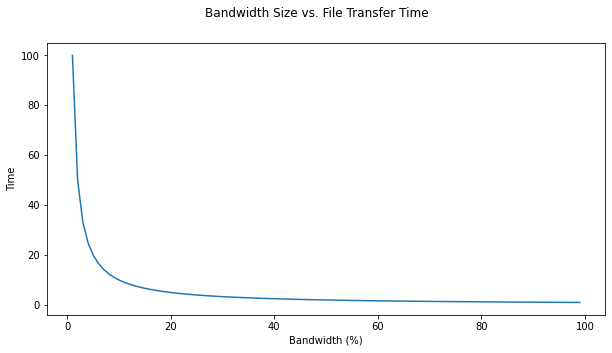

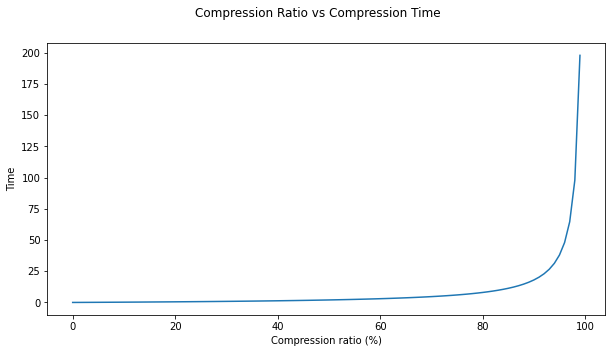

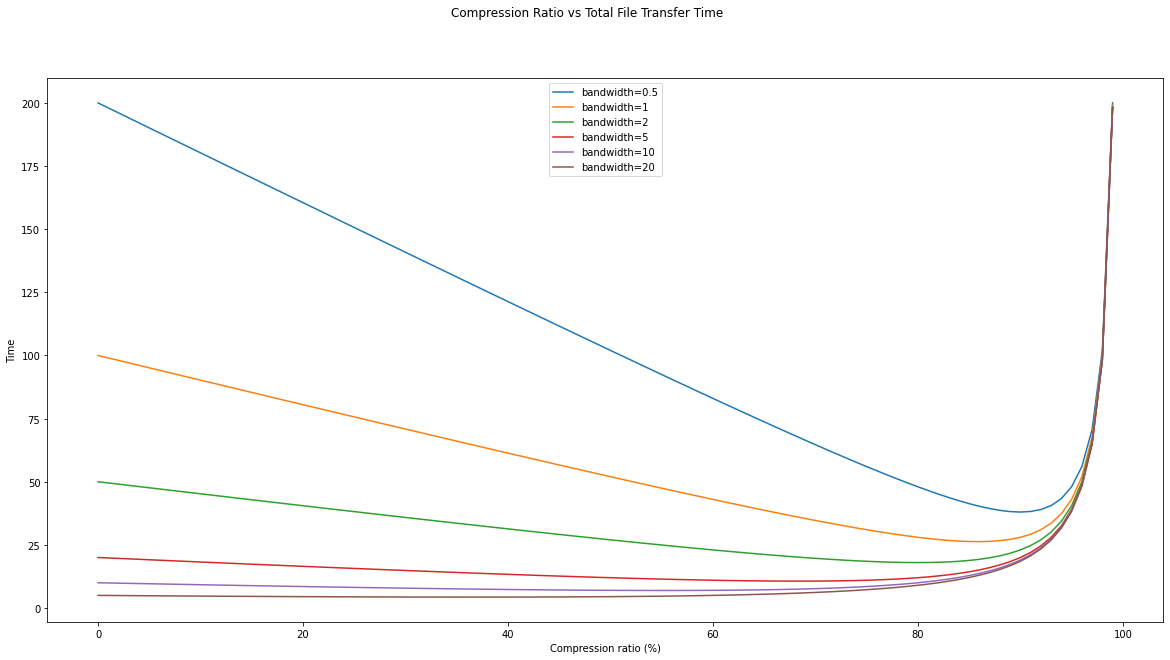

In [19]:

def ctime(filesize, reduction):
    '''Calculates compression time for the given file size and size reduction percentage.'''
    scalar = 200
    offset = scalar / filesize
    return scalar / (filesize - (reduction/100) * filesize) - offset

def time(filesize, bandwidth, reduction, comprtime):
    '''Calculates total transfer time for the given file size, bandwith, 
    size reduction percentage and compression time.'''
    return comprtime + (filesize - (reduction/100) * filesize) / bandwidth

def draw_1(filesize=100):

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10, forward=True)  
    ax.set(xlabel='Compression ratio (%)', ylabel='Time')

    xs = np.arange(0, filesize)

    for bandwidth in [0.5, 1, 2, 5, 10, 20]:
        ys = [time(filesize, bandwidth, reduction=x, comprtime=ctime(filesize, x)) for x in xs]
        ax.plot(xs, ys, label=f'bandwidth={bandwidth}')
        ax.legend()

    fig.suptitle('Compression Ratio vs Total File Transfer Time')
    fig.savefig(f'compratio-vs-total-time.png', format='png')


def draw_2(filesize=100):

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)  
    
    ax.set(xlabel='Compression ratio (%)', ylabel='Time')
    
    xs = np.arange(0, filesize)
    ax.plot(xs, [ctime(filesize, x) for x in xs])

    fig.suptitle('Compression Ratio vs Compression Time')
    fig.savefig(f'compratio-vs-comptime.png', format='png')


def draw_3(filesize=100):

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)  
    
    ax.set(xlabel='Bandwidth (%)', ylabel='Time')
    

    xs = np.arange(1, filesize)
    ax.plot(xs, [time(filesize, bandwidth=x*filesize/100, reduction=0, comprtime=0) for x in xs])

    fig.suptitle('Bandwidth Size vs. File Transfer Time')
    fig.savefig(f'bandwidth-vs-time.png', format='png')



draw_3()
draw_2()
draw_1()


In [20]:
# Select which compression algorithms to analyse and plot
algorithms = ['lzop', 'lzma', 'snappy']

clang14 release 1 lzop
clang14 release 1 lzma
clang14 release 1 snappy


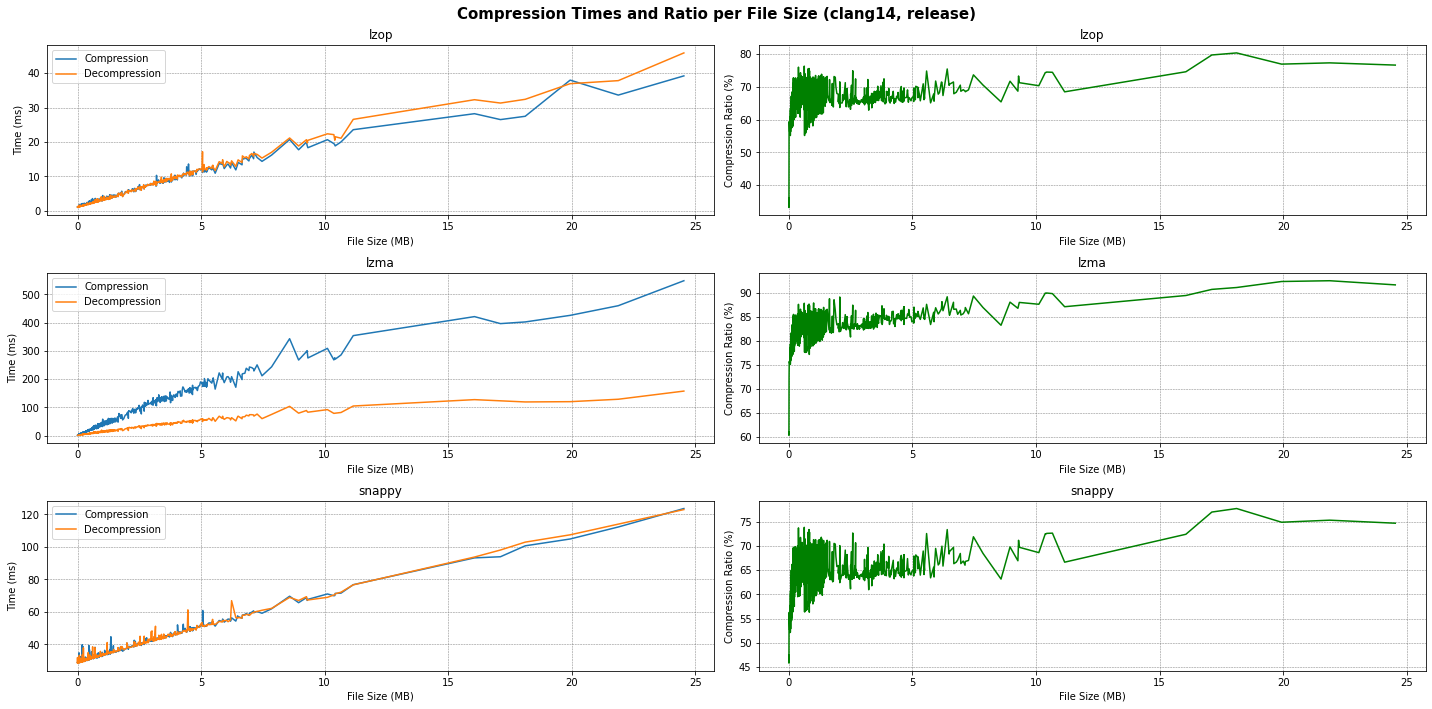

In [21]:
# Plot graphs where x='Original File Size' and y='Compression Time' and 'Compression Ratio'

def plot_graph(compiler, mode, level=1):

    fig, axs = plt.subplots(len(algorithms), 2)
    fig.set_size_inches(20, 10, forward=True)   

    for idx, alg in enumerate(algorithms):
        print (compiler, mode, level, alg)
        df = data[compiler][mode][level][alg]
        df = df.sort_values('Size_Original', ascending=True)

        x = df['Size_Original'] / (1024 * 1024)  # bytes
        y1 = df['Time_Compress'] * 1000          # milliseconds
        y2 = df['Time_Decompress'] * 1000        # milliseconds
        y3 = df['Size_Ratio']

        axs[idx, 0].set_title(alg)
        axs[idx, 1].set_title(alg)

        axs[idx, 0].plot(x, y1, label='Compression')
        axs[idx, 0].plot(x, y2, label='Decompression')
        axs[idx, 0].legend()
        axs[idx, 1].plot(x, y3, 'green')

        axs[idx, 0].grid(color='gray', linestyle='dashed', linewidth=0.5)
        axs[idx, 1].grid(color='gray', linestyle='dashed', linewidth=0.5)

        axs[idx, 0].set(xlabel='File Size (MB)', ylabel='Time (ms)')
        axs[idx, 1].set(xlabel='File Size (MB)', ylabel='Compression Ratio (%)')

    fig.suptitle(f'Compression Times and Ratio per File Size ({compiler}, {mode})', fontsize= 15, fontweight='bold')
    fig.tight_layout()
    
    plt.savefig(f'compression_time_ratio_{mode}_{compiler}.png', format='png')

plot_graph('clang14', 'release', 1)


In [22]:
# Select which compression algorithms to analyse and plot
algorithms = ['lzop', 'lzma']

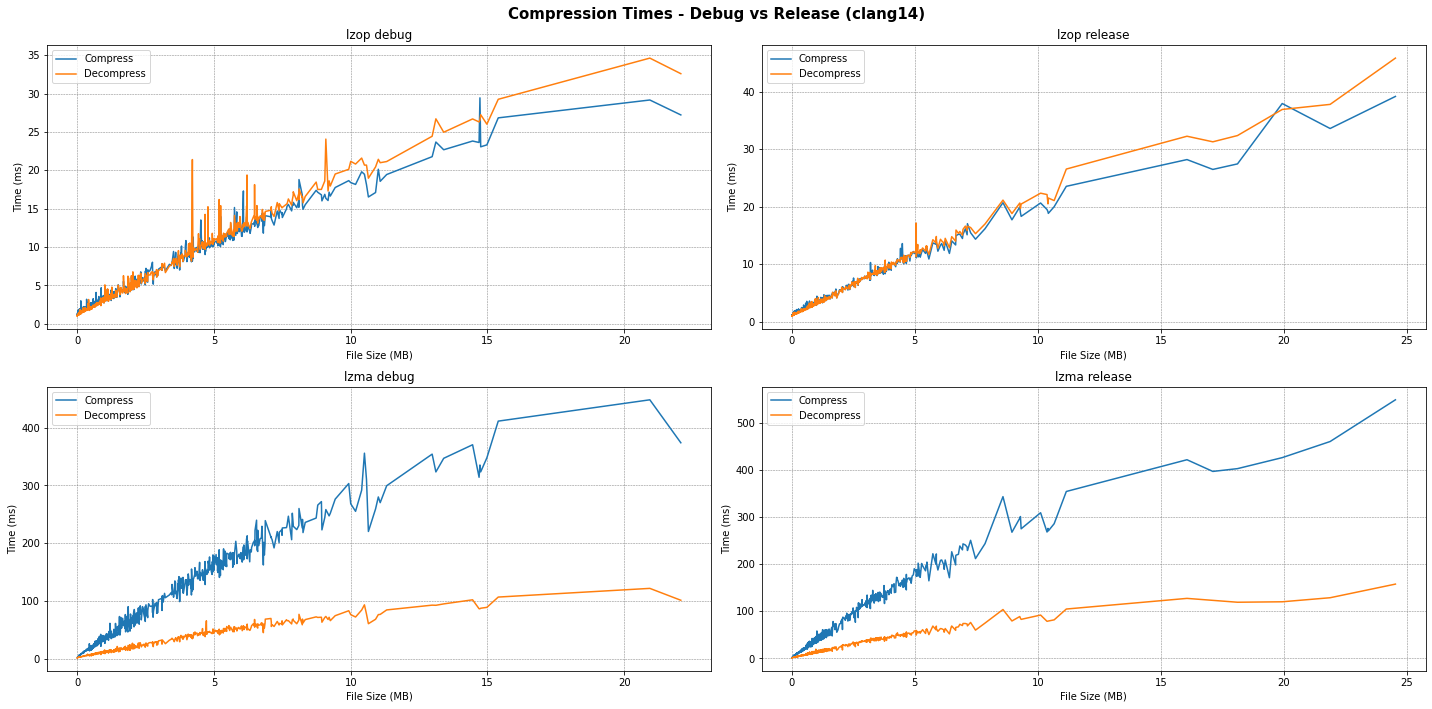

In [23]:
# Compare compression times for debug and release builds

compiler = 'clang14'
compression_level = 1

def plot_graph():
    fig, axs = plt.subplots(len(algorithms), 2)
    fig.set_size_inches(20, 10, forward=True)

    for idx, alg in enumerate(algorithms):

        df_deb = data[compiler]['debug'][compression_level][alg].sort_values('Size_Original', ascending=True)
        df_rel = data[compiler]['release'][compression_level][alg].sort_values('Size_Original', ascending=True)
        
        x1 = df_deb['Size_Original'] / (1024 * 1024)
        y1 = df_deb['Time_Compress'] * 1000
        z1 = df_deb['Time_Decompress'] * 1000
 
        x2 = df_rel['Size_Original'] / (1024 * 1024)
        y2 = df_rel['Time_Compress'] * 1000
        z2 = df_rel['Time_Decompress'] * 1000

        axs[idx, 0].set_title(f'{alg} debug')
        axs[idx, 1].set_title(f'{alg} release')

        axs[idx, 0].plot(x1, y1, label='Compress')
        axs[idx, 0].plot(x1, z1, label='Decompress')
        
        axs[idx, 1].plot(x2, y2, label='Compress')
        axs[idx, 1].plot(x2, z2, label='Decompress')

        axs[idx, 0].legend()
        axs[idx, 1].legend()
        
        axs[idx, 0].grid(color='gray', linestyle='dashed', linewidth=0.5)
        axs[idx, 1].grid(color='gray', linestyle='dashed', linewidth=0.5)

        axs[idx, 0].set(xlabel='File Size (MB)', ylabel='Time (ms)')
        axs[idx, 1].set(xlabel='File Size (MB)', ylabel='Time (ms)')

    fig.suptitle(f'Compression Times - Debug vs Release ({compiler})', fontsize= 15, fontweight='bold')
    
    fig.tight_layout()

    plt.savefig(f'compression_time_debug_vs_release_{compiler}.svg', format='svg')



plot_graph()